# WeatherPy



In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
name = []
lat =[]
temp= []
Humidity =[]
Cloudiness=[]
Wind_Speed=[]

record = 1
for city in cities:
    try:   
        response = requests.get(query_url + city).json()
        print(f"Retrieving data for {city}, with city number:{record}")
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        record= record + 1
        
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    continue
        

Retrieving data for rikitea, with city number:1
Retrieving data for pevek, with city number:2
Retrieving data for mangai, with city number:3
Retrieving data for pangnirtung, with city number:4
Retrieving data for mataura, with city number:5
Retrieving data for hithadhoo, with city number:6
Retrieving data for marigot, with city number:7
Retrieving data for punta arenas, with city number:8
Retrieving data for barrow, with city number:9
Retrieving data for port blair, with city number:10
Retrieving data for butaritari, with city number:11
Retrieving data for kapaa, with city number:12
Retrieving data for bethel, with city number:13
Retrieving data for atuona, with city number:14
Retrieving data for albany, with city number:15
Retrieving data for maumere, with city number:16
Retrieving data for ponta do sol, with city number:17
Retrieving data for port alfred, with city number:18
Retrieving data for avarua, with city number:19
Retrieving data for ushuaia, with city number:20
Retrieving da

Retrieving data for qaanaaq, with city number:138
Retrieving data for saint-philippe, with city number:139
Retrieving data for mount isa, with city number:140
Retrieving data for miandrivazo, with city number:141
Retrieving data for esperance, with city number:142
Retrieving data for matara, with city number:143
Retrieving data for hilo, with city number:144
Retrieving data for daphne, with city number:145
Retrieving data for matay, with city number:146
Retrieving data for san patricio, with city number:147
Retrieving data for castro, with city number:148
Retrieving data for talnakh, with city number:149
Retrieving data for kruisfontein, with city number:150
Retrieving data for palamos, with city number:151
Retrieving data for anloga, with city number:152
Retrieving data for nizhneyansk, with city number:153
City not found. Skipping...
Retrieving data for tabou, with city number:153
Retrieving data for acapulco, with city number:154
Retrieving data for sitka, with city number:155
Retri

Retrieving data for axim, with city number:274
Retrieving data for oktyabrskoye, with city number:275
Retrieving data for champerico, with city number:276
Retrieving data for atasu, with city number:277
Retrieving data for manta, with city number:278
Retrieving data for poitiers, with city number:279
Retrieving data for darnah, with city number:280
Retrieving data for cidreira, with city number:281
Retrieving data for cherskiy, with city number:282
Retrieving data for kashi, with city number:283
City not found. Skipping...
Retrieving data for tigil, with city number:283
Retrieving data for kamaishi, with city number:284
Retrieving data for zhigansk, with city number:285
Retrieving data for hobyo, with city number:286
Retrieving data for saldanha, with city number:287
Retrieving data for chapais, with city number:288
Retrieving data for torbay, with city number:289
Retrieving data for altamira, with city number:290
Retrieving data for kalmunai, with city number:291
Retrieving data for a

Retrieving data for alice springs, with city number:417
Retrieving data for antropovo, with city number:418
Retrieving data for umm lajj, with city number:419
Retrieving data for qingdao, with city number:420
Retrieving data for odesskoye, with city number:421
Retrieving data for tigzirt, with city number:422
Retrieving data for babanusah, with city number:423
City not found. Skipping...
Retrieving data for geraldton, with city number:423
Retrieving data for monywa, with city number:424
Retrieving data for araguaina, with city number:425
Retrieving data for nicoya, with city number:426
Retrieving data for basco, with city number:427
Retrieving data for bellary, with city number:428
Retrieving data for tual, with city number:429
Retrieving data for shingu, with city number:430
Retrieving data for belmonte, with city number:431
Retrieving data for mutis, with city number:432
Retrieving data for opuwo, with city number:433
Retrieving data for bandiagara, with city number:434
Retrieving da

Retrieving data for soubre, with city number:557
Retrieving data for kamenka, with city number:558
Retrieving data for maridi, with city number:559
City not found. Skipping...
Retrieving data for saint-georges, with city number:559


In [62]:
weather_dict = {'name': name,
                'lat': lat,
                'temp': temp,
                'Humidity': Humidity,
                'Cloudiness': Cloudiness,
                'Wind_Speed': Wind_Speed}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
df = pd.DataFrame(weather_dict)
df

,name,lat,temp,Humidity,Cloudiness,Wind_Speed
0,Rikitea,-23.12,24.03,92,100,5.74
1,Pevek,69.70,-11.84,82,53,2.99
2,Mangai,-4.07,22.65,96,66,1.24
3,Pangnirtung,66.15,-6.00,67,75,3.11
4,Mataura,-46.19,16.11,62,100,1.79
...,...,...,...,...,...,...
554,Vila Franca do Campo,37.72,18.00,68,20,5.10
555,Boyolangu,-8.09,23.42,86,72,2.55
556,Soubre,5.79,24.50,95,67,1.11
557,Kamenka,48.03,15.00,75,9,1.79


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

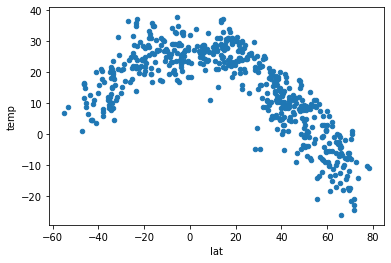

In [64]:
df.plot(kind='scatter', x='lat', y='temp')

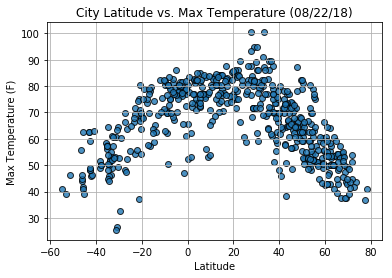

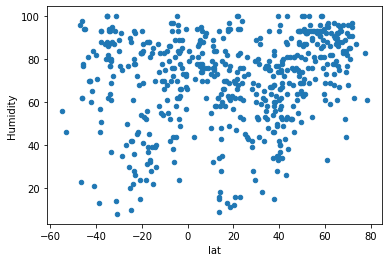

In [65]:
df.plot(kind='scatter', x='lat', y='Humidity')

#### Latitude vs. Humidity Plot

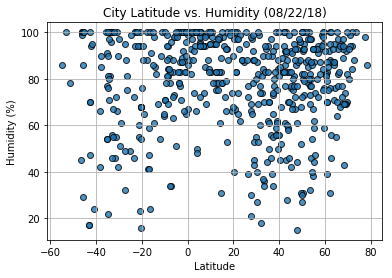

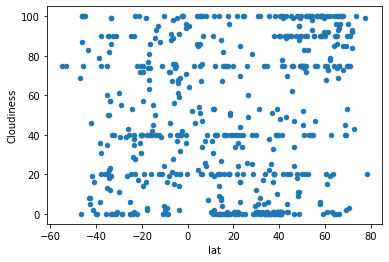

In [66]:
df.plot(kind='scatter', x='lat', y='Cloudiness')

#### Latitude vs. Cloudiness Plot

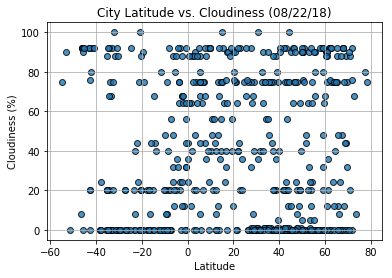

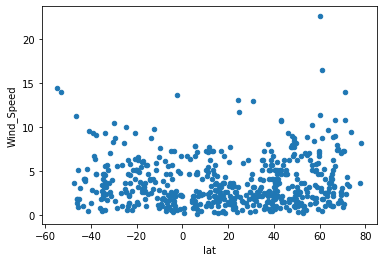

In [67]:
df.plot(kind='scatter', x='lat', y='Wind_Speed')

#### Latitude vs. Wind Speed Plot

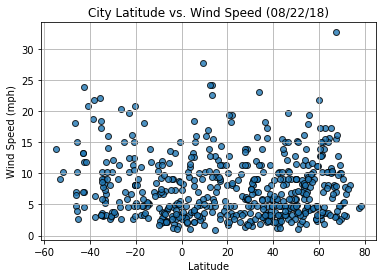